<a href="https://colab.research.google.com/github/ssnyu/APM/blob/main/1.2_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brownian Motion

## Simulating Brownian Motion

Using Brownian motion to simulate crossing of barrier level using while loop for 1000 steps

<ipython-input-12-5707b44177ee>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pathv[it] = pathv[it - 1] + np.random.normal(0,10,1)


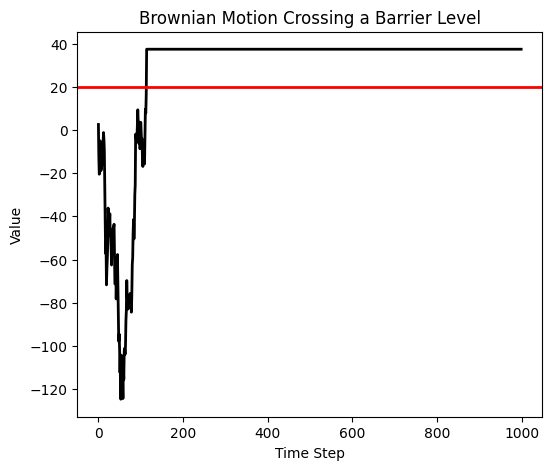

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(1121)
barl = 20  # Barrier level
nrows = 1000  # Number of simulation steps
pathv = np.zeros(nrows)  # Allocate path vector
pathv[0] = np.random.normal()  # Initialize path
it = 1  # Initialize simulation index

while it < nrows and pathv[it - 1] < barl:
    pathv[it] = pathv[it - 1] + np.random.normal(0,10,1)
    it += 1

# Fill remaining path after it crosses barl
if it < nrows:
    pathv[it:nrows] = pathv[it - 1]

# Plot the Brownian motion
plt.figure(figsize=(6, 5))
plt.plot(pathv, color="black", linestyle="-", linewidth=2)
plt.axhline(y=barl, color="red", linewidth=2)
plt.title("Brownian Motion Crossing a Barrier Level")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

## Statistics of Brownian Motion
The statistics of Brownian motion can be estimated by
simulating multiple paths.


---


An example of a statistic is the expected value of
Brownian motion at a fixed time horizon, which is the
option payout for the strike price k: **E[(pt − k)+]**<br>

Another statistic is the probability of Brownian motion
crossing a boundary (barrier) b: **E[1(pt − b)]**.



---


Brownian Motion parameters
*   Sigma : volatility
*   Drift : Long term growth rate

In [13]:
# Brownian motion parameters
sigma = 10.0  # Volatility
drift = 0  # Drift
nrows = 1000  # Number of simulation steps
nsimu = 100  # Number of simulations

# Simulate multiple paths of Brownian motion
np.random.seed(1121)
pathm = np.random.normal(loc=drift, scale=sigma, size=(nsimu, nrows))
pathm = np.cumsum(pathm, axis=1)

# Final distribution of paths
print("Mean:", round(np.mean(pathm[:, -1]),2))
print("Standard deviation:", round(np.std(pathm[:, -1]),2))

# Calculate option payout at maturity
strikep = 50  # Strike price
payouts = np.maximum(pathm[:, -1] - strikep, 0)
print("Expected payout:", round(np.mean(payouts),2))  # Expected payout

# Calculate probability of crossing the barrier at any point
barl = 50
crossi = np.any(pathm > barl, axis=1)
print("Probability of crossing barrier:", round(np.mean(crossi),2))  # Probability of crossing the barrier

Mean: -33.31
Standard deviation: 299.49
Expected payout: 85.53
Probability of crossing barrier: 0.86


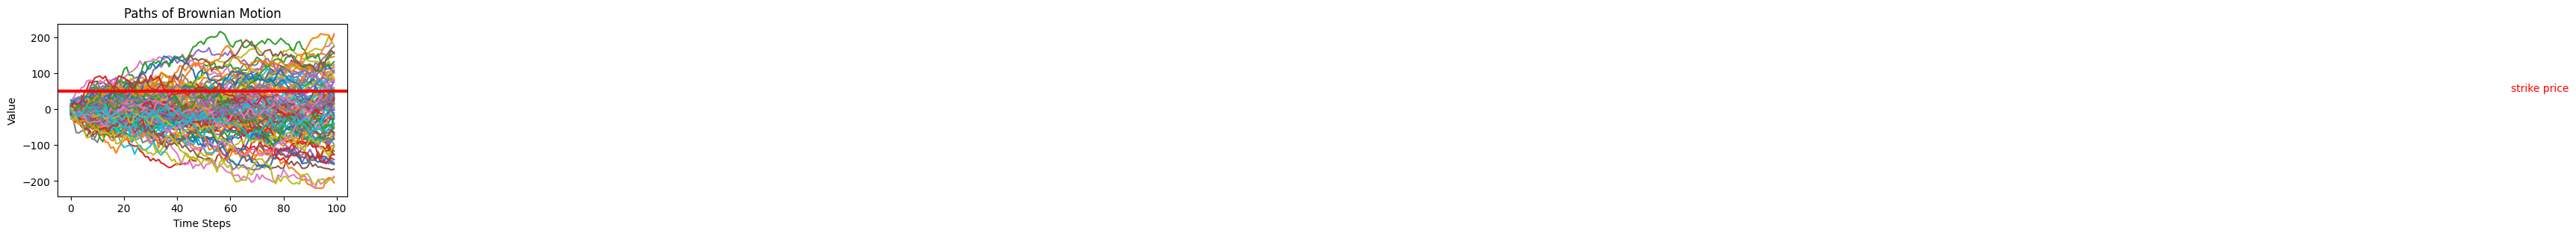

In [14]:
# Plot
plt.figure(figsize=(5, 3))  # Adjust the figsize as needed
plt.plot(pathm[:, :100].T)
plt.axhline(y=strikep, color="red", linewidth=3)
plt.title("Paths of Brownian Motion")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.text(nrows - 60, strikep, "strike price", ha='right', color='red')
plt.show()